<a href="https://colab.research.google.com/github/DKAbir111/Artificial-Intelligence/blob/main/Human_Disease_Prediction__EDA_Final_Year_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Importing necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for statistical data visualization
import warnings  # Warnings library for managing warnings during code execution

# Suppressing warning messages to keep the output clean
warnings.filterwarnings("ignore")

**Mount Drive**

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read CSV for disease data analysis**

In [73]:
df=pd.read_csv("/content/drive/MyDrive/Final Year Research/My Data set/Necessary Data/dataset.csv")

In [74]:
df.head(5)# Displaying the first 5 rows of the training data DataFrame

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing Hyphen From the data**

In [75]:
# Iterate through each column in the Data
for col in df.columns:

    # Replace underscores with spaces in the values of the current column
    df[col] = df[col].str.replace('_', ' ')

# Display the few sample rows of the modified Data
df.sample(5)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
3665,Chicken pox,itching,skin rash,fatigue,lethargy,high fever,headache,loss of appetite,mild fever,swelled lymph nodes,malaise,red spots over body,NaN,NaN,NaN,NaN,NaN,NaN
1623,Psoriasis,skin rash,skin peeling,silver like dusting,small dents in nails,inflammatory nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4735,Hepatitis B,itching,fatigue,lethargy,yellowish skin,dark urine,loss of appetite,abdominal pain,yellow urine,yellowing of eyes,malaise,receiving blood transfusion,receiving unsterile injections,NaN,NaN,NaN,NaN,NaN
4711,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3092,Dengue,skin rash,chills,joint pain,vomiting,fatigue,high fever,headache,nausea,loss of appetite,pain behind the eyes,back pain,malaise,muscle pain,red spots over body,NaN,NaN,NaN


**Remove the trailing space from the symptom columns**

In [76]:
# Get the column names of the original DataFrame
cols = df.columns
# Flatten the DataFrame values into a 1D array
data = df[cols].values.flatten()
# Create a pandas Series from the flattened data
s = pd.Series(data)
# Remove leading and trailing whitespaces from each element in the Series
s = s.str.strip()
# Reshape the 1D array back into the original DataFrame shape
s = s.values.reshape(df.shape)
# Create a new DataFrame with the cleaned values and original column names
df = pd.DataFrame(s, columns=df.columns)
# Display the first few rows of the cleaned DataFrame
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Describe some characteristics of data**

In [77]:
print(df.shape)#Shape of data set

(4920, 18)


In [78]:
df.dtypes# Retrieving the data types of each column in the DataFrame 'data'

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object

In [79]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,muscle pain,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [80]:
df.info# Print a summary of the DataFrame information

<bound method DataFrame.info of                                       Disease            Symptom_1  \
0                            Fungal infection              itching   
1                            Fungal infection            skin rash   
2                            Fungal infection              itching   
3                            Fungal infection              itching   
4                            Fungal infection              itching   
...                                       ...                  ...   
4915  (vertigo) Paroymsal  Positional Vertigo             vomiting   
4916                                     Acne            skin rash   
4917                  Urinary tract infection  burning micturition   
4918                                Psoriasis            skin rash   
4919                                 Impetigo            skin rash   

                 Symptom_2             Symptom_3                 Symptom_4  \
0                skin rash  nodal skin eruptions 

**Checking the null value of the data**

In [81]:
# Check for null values in each column and create a DataFrame with the counts
null_checker = df.isnull().sum().to_frame(name='Null Count')
# Print the DataFrame showing the count of null values for each column
print(null_checker)


            Null Count
Disease              0
Symptom_1            0
Symptom_2            0
Symptom_3            0
Symptom_4          348
Symptom_5         1206
Symptom_6         1986
Symptom_7         2652
Symptom_8         2976
Symptom_9         3228
Symptom_10        3408
Symptom_11        3726
Symptom_12        4176
Symptom_13        4416
Symptom_14        4614
Symptom_15        4680
Symptom_16        4728
Symptom_17        4848


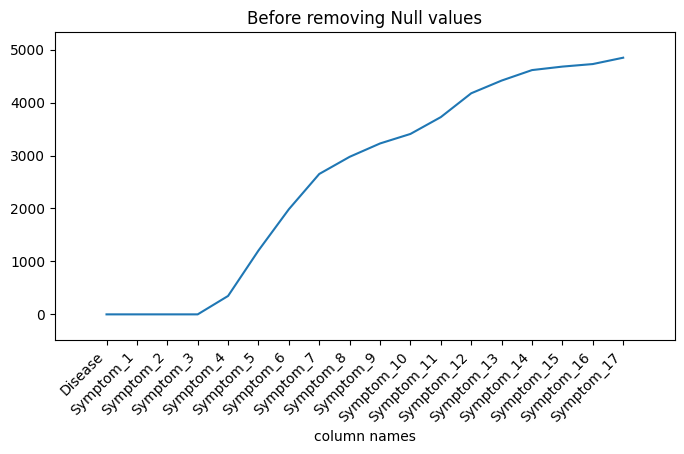

In [82]:
# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Plotting the null counts for each column
plt.plot(null_checker.index, null_checker['Null Count'])

# Set the x-axis ticks and rotate them for better visibility
plt.xticks(null_checker.index, null_checker.index, rotation=45, horizontalalignment='right')

# Set the title for the plot
plt.title('Before removing Null values')

# Label the x-axis
plt.xlabel('column names')

# Adjust margins for better layout
plt.margins(0.1)

# Display the plot
plt.show()


**Fill the NaN values with zero**

In [83]:
df = df.fillna(0)
df.sample(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
2754,Diabetes,fatigue,weight loss,restlessness,lethargy,irregular sugar level,blurred and distorted vision,obesity,excessive hunger,increased appetite,polyuria,0,0,0,0,0,0,0
1135,Hypothyroidism,fatigue,weight gain,mood swings,lethargy,dizziness,puffy face and eyes,enlarged thyroid,brittle nails,swollen extremeties,depression,irritability,abnormal menstruation,0,0,0,0,0
2106,Peptic ulcer diseae,vomiting,indigestion,loss of appetite,abdominal pain,internal itching,0,0,0,0,0,0,0,0,0,0,0,0
290,Heart attack,vomiting,breathlessness,sweating,chest pain,0,0,0,0,0,0,0,0,0,0,0,0,0
3955,hepatitis A,joint pain,vomiting,yellowish skin,dark urine,nausea,loss of appetite,abdominal pain,diarrhoea,mild fever,yellowing of eyes,muscle pain,0,0,0,0,0,0


**Symptom severity rank**

In [84]:
dfs=pd.read_csv("/content/drive/MyDrive/Final Year Research/My Data set/Necessary Data/Symptom-severity.csv")

In [85]:
dfs.sample(5)

,Symptom,weight
48,malaise,6
75,extra_marital_contacts,5
57,weakness_in_limbs,7
111,receiving_blood_transfusion,5
105,polyuria,4


In [86]:
dfs['Symptom'] = dfs['Symptom'].str.replace('_',' ')
dfs.head(5)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


**Total Unique Symptom according to Symptom Sevarity list**

In [87]:
dfs['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

**Encode Symptomn of df(Disease data) according to the sevarity of syptoms from dfs(Symptom Sevarity)**

In [88]:
# Extract the values from the original DataFrame
vals = df.values

# Get unique symptoms from another DataFrame 'dfs'
symptoms = dfs['Symptom'].unique()

# Iterate over each unique symptom
for i in range(len(symptoms)):
    # Replace values in 'vals' with corresponding weights from 'dfs'
    vals[vals == symptoms[i]] = dfs[dfs['Symptom'] == symptoms[i]]['weight'].values[0]

# Create a new DataFrame 'd' with the updated values and original column names
dummy = pd.DataFrame(vals, columns=cols)

# Display the first few rows of the updated DataFrame
dummy.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Assign symptoms with no rank to zero**

In [89]:
dummy = dummy.replace('dischromic  patches', 0)
dummy = dummy.replace('spotting  urination',0)
df = dummy.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Checking the data frame after handling null value**

In [91]:
# Check for null values in each column and create a DataFrame with the counts
null_checker = df.isnull().sum().to_frame(name='Null Count')
# Print the DataFrame showing the count of null values for each column
print(null_checker)

            Null Count
Disease              0
Symptom_1            0
Symptom_2            0
Symptom_3            0
Symptom_4            0
Symptom_5            0
Symptom_6            0
Symptom_7            0
Symptom_8            0
Symptom_9            0
Symptom_10           0
Symptom_11           0
Symptom_12           0
Symptom_13           0
Symptom_14           0
Symptom_15           0
Symptom_16           0
Symptom_17           0


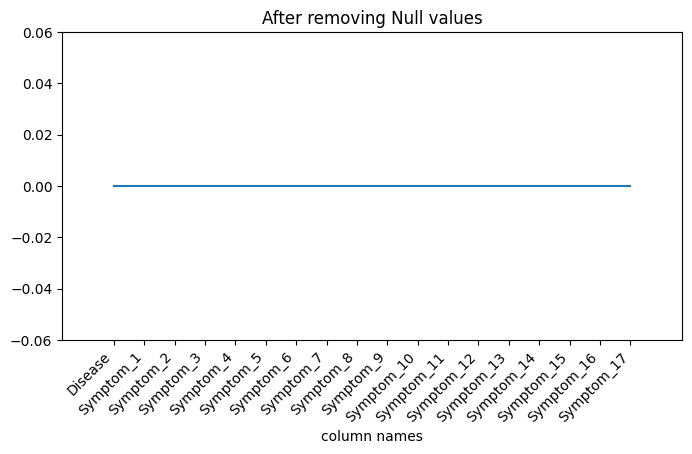

In [92]:
# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Plotting the null counts for each column
plt.plot(null_checker.index, null_checker['Null Count'])

# Set the x-axis ticks and rotate them for better visibility
plt.xticks(null_checker.index, null_checker.index, rotation=45, horizontalalignment='right')

# Set the title for the plot
plt.title('After removing Null values')

# Label the x-axis
plt.xlabel('column names')

# Adjust margins for better layout
plt.margins(0.1)

# Display the plot
plt.show()
